<a href="https://colab.research.google.com/github/MitehReddy/ADM-2025-2-2-/blob/main/LAB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
np.random.seed(42)
data = np.random.normal(50, 15, 100)
outliers = np.random.uniform(100, 120, 5)
data = np.concatenate([data, outliers])
df = pd.DataFrame(data, columns=['Value'])

df.head()

,Value
0,57.450712
1,47.926035
2,59.715328
3,72.845448
4,46.487699


In [6]:
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

print("Outliers detected using Z-score:")
print(outliers_zscore)


Outliers detected using Z-score:
          Value
100  108.348220
103  106.752303
104  118.858194


In [7]:
Q1 = df["Value"].quantile(0.25)
Q3 = df["Value"].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df["Value"] < lower_bound) | (df["Value"] > upper_bound)]

print("Outliers detected using IQR:")
print(outliers_iqr)


Outliers detected using IQR:
          Value
74    10.703823
100  108.348220
101  104.442156
102  102.397307
103  106.752303
104  118.858194


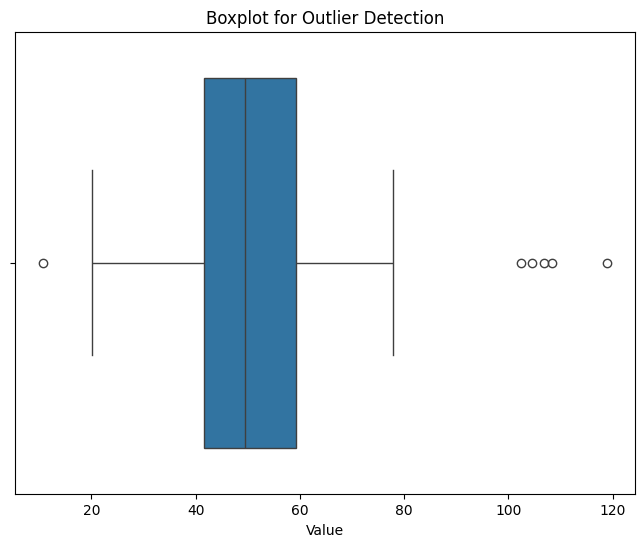

In [8]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [9]:
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

In [10]:
df_removed = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

In [11]:
median_value = df['Value'].median()
df_imputed = df.copy()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
                               (df_imputed['Value'] > upper_bound),
                               median_value, df_imputed['Value'])


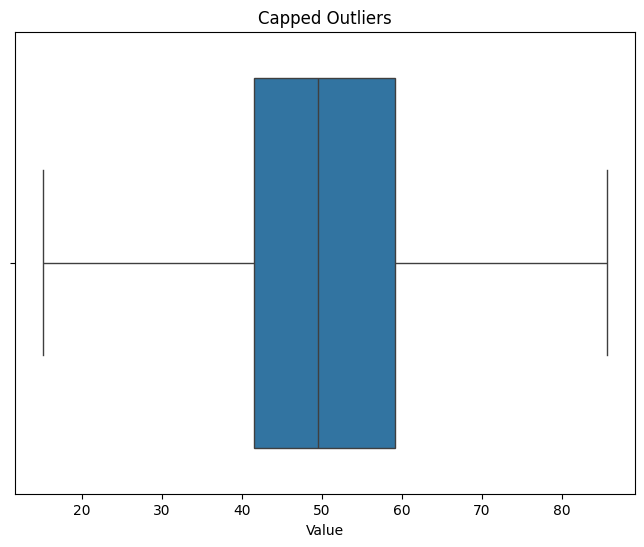

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()

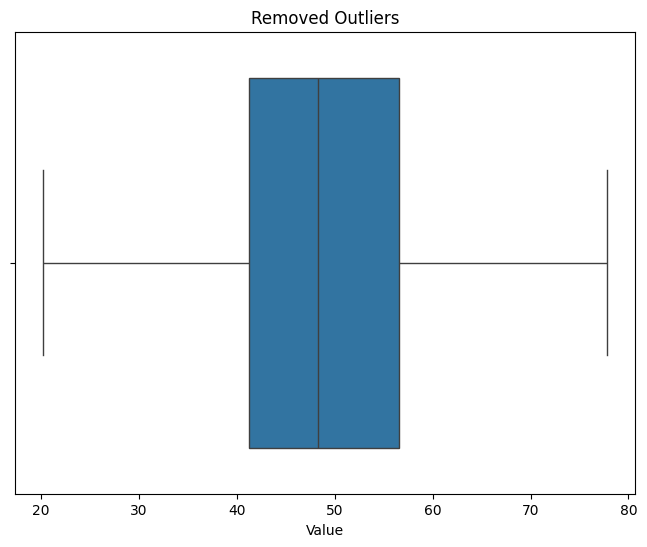

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()

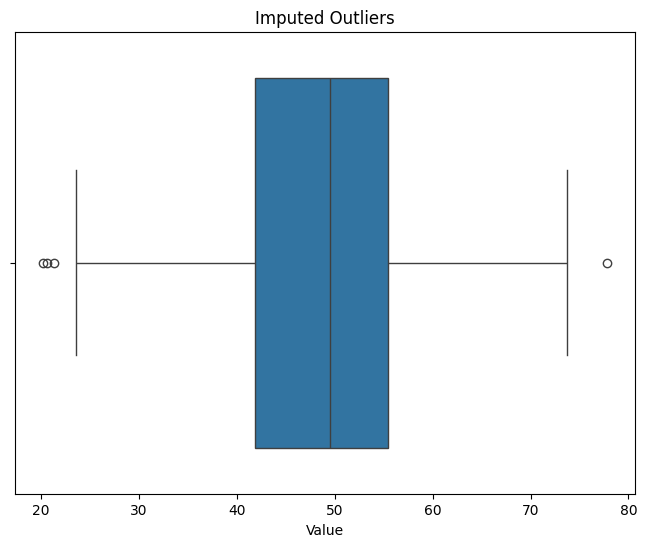

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()